1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

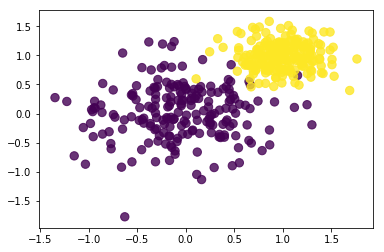

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

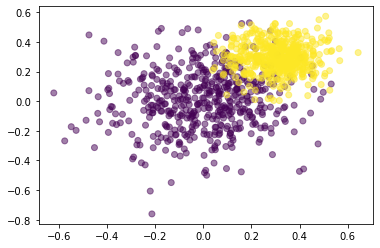

In [2]:


import numpy as np
import matplotlib.pyplot as plt

def generate_datasets(size, mean1=0, stand_dev1=0.2, mean2=0.3, stand_dev2=0.1):
    x1 = np.random.normal(mean1, stand_dev1, size)
    y1 = np.random.normal(mean1, stand_dev1, size)
    colors1 = np.full(size, 0)
    
    x2 = np.random.normal(mean2, stand_dev2, size)
    y2 = np.random.normal(mean2, stand_dev2, size)
    colors2 = np.full(size, 1)
    
    x = np.concatenate([x1, x2])
    y = np.concatenate([y1, y2])
    colors = np.concatenate([colors1, colors2])
    
    return x, y, colors
    
x, y, colors = generate_datasets(500)


plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()



2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [4]:
import pickle
import pandas as pd
import numpy as np

filename = 'residuals_261.pkl'
pickle_file = pd.read_pickle(filename)

data = np.array(pickle_file, ndmin=1)[0]

df = pd.DataFrame(data, columns=['residuals', 'distances'])
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [5]:
df_clean = df[abs(df['residuals']) < 2]
df_clean

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


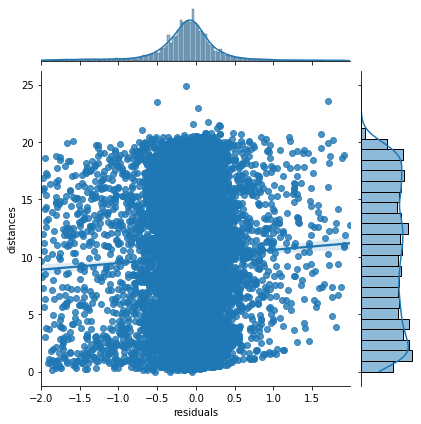

In [6]:
import seaborn as sns

sns.jointplot(x='residuals', y='distances', data=df_clean, kind='reg')


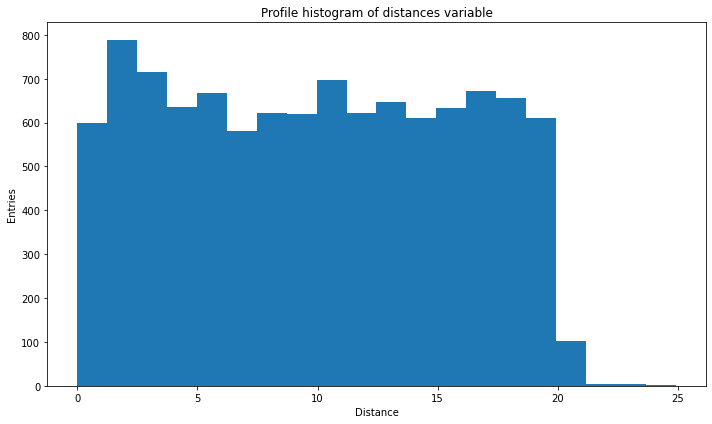

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
h, bins, _ = plt.hist(df_clean['distances'], bins=20)

ax.set_title('Profile histogram of distances variable')
ax.set_xlabel('Distance')
ax.set_ylabel('Entries')
fig.tight_layout()

In [8]:
def compute_stats():
    x = []
    y = []
    err_y = []
    for index in range(len(bins)-1):
        left = bins[index]
        right = bins[index+1]

        center = (right - left) / 2 + left
        mean = df_clean[(df_clean['distances'] >= left) & (df_clean['distances'] <= right)]['residuals'].mean()
        std = df_clean[(df_clean['distances'] >= left) & (df_clean['distances'] <= right)]['residuals'].std()

        x.append(center)
        y.append(mean)
        err_y.append(std)

    x = np.array(x)
    y = np.array(y)
    err_y = np.array(err_y)
    
    return x, y, err_y

x, y, err_y = compute_stats()

print('x: ', x, '\n')
print('y: ', y, '\n')
print('err_y: ', err_y)

x:  [ 0.6225  1.8675  3.1125  4.3575  5.6025  6.8475  8.0925  9.3375 10.5825
 11.8275 13.0725 14.3175 15.5625 16.8075 18.0525 19.2975 20.5425 21.7875
 23.0325 24.2775] 

y:  [-0.20298651 -0.16346985 -0.16058613 -0.13457787 -0.13448661 -0.09600764
 -0.09284342 -0.08822673 -0.0591651  -0.08039035 -0.11016332 -0.14977026
 -0.13796675 -0.15048569 -0.13854145 -0.07072831  0.05114286  0.20133333
  0.41285714 -0.12857143] 

err_y:  [0.46906745 0.42093315 0.40510863 0.4152323  0.41254988 0.47127579
 0.41610324 0.41383771 0.46252125 0.46764395 0.49306768 0.44858705
 0.47054736 0.4176323  0.41132145 0.38352696 0.49544021 0.14407945
 1.15402844        nan]


<ErrorbarContainer object of 3 artists>

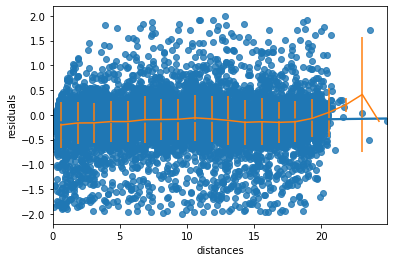

In [9]:
ax = sns.regplot(x='distances', y='residuals', data=df_clean)
ax.errorbar(x, y, yerr=err_y)

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


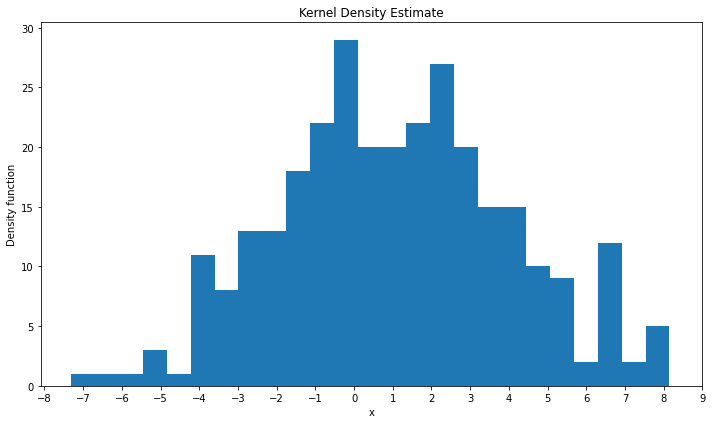

In [10]:
import math

np.random.seed(0)

mean, std, size = 1, 3, 300
x = np.random.normal(mean, std, size)

fig, ax = plt.subplots(figsize=(10, 6))
h, bins, _ = plt.hist(x, bins=25, histtype='barstacked')
ticks = list(range(math.floor(x.min()), math.ceil(x.max())+1))

ax.set_title('Kernel Density Estimate')
ax.set_xlabel('x')
ax.set_ylabel('Density function')
ax.set_xticks(ticks)
fig.tight_layout()